In [3]:
# -*- coding: utf-8 -*-
"""
Created on Thu May 28 17:02:30 2020

@author: Johannes Heyn, more to come
"""

'\nCreated on Thu May 28 17:02:30 2020\n\n@author: Johannes Heyn, more to come\n'

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime

In [5]:
filename = "all_books_popularByDate.csv"
base_dir = "."
data_dir = "data"
fullpath = os.path.join(base_dir, data_dir, filename)

# Load and prepare data

In [6]:
df = pd.read_csv(fullpath)
print(df.head())
print(df.columns)
print(df.info())

                                                 url               title  \
0  https://www.goodreads.com/book/show/38260251-t...     Tangled Like Us   
1  https://www.goodreads.com/book/show/44094817-t...  The Castle Mystery   
2  https://www.goodreads.com/book/show/36300682-w...  When You Read This   
3  https://www.goodreads.com/book/show/50212494-t...       The Flatshare   
4  https://www.goodreads.com/book/show/46006080-t...            Too Many   

           author  num_ratings  num_reviews  avg_rating num_pages language  \
0  Krista Ritchie         3506          510        4.08     484.0  English   
1      Joyce Cato         2567          153        4.28     219.0  English   
2    Mary  Adkins         3079          633        3.58     400.0       []   
3    Beth O'Leary        71110        10764        4.13     336.0  English   
4     Alexa Riley         2852          268        3.77      71.0       []   

          publish_date                                             genres 

In [7]:
df['pd_aux'] = pd.to_datetime(df['publish_date'], format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
date_time_now = datetime.datetime.now()
age = date_time_now - df['pd_aux']
age = age.apply(lambda x: x.days)
df['age'] = age
df = df.drop('pd_aux', axis = 1)
print(df.info)

<bound method DataFrame.info of                                                     url               title  \
0     https://www.goodreads.com/book/show/38260251-t...     Tangled Like Us   
1     https://www.goodreads.com/book/show/44094817-t...  The Castle Mystery   
2     https://www.goodreads.com/book/show/36300682-w...  When You Read This   
3     https://www.goodreads.com/book/show/50212494-t...       The Flatshare   
4     https://www.goodreads.com/book/show/46006080-t...            Too Many   
...                                                 ...                 ...   
4615  https://www.goodreads.com/book/show/52878453-d...  Death in Her Hands   
4616  https://www.goodreads.com/book/show/51933429-t...      The Guest List   
4617  https://www.goodreads.com/book/show/51791252-t...  The Vanishing Half   
4618  https://www.goodreads.com/book/show/50833559-h...    Home Before Dark   
4619  https://www.goodreads.com/book/show/53152636-m...      Mexican Gothic   

                   

In [8]:
#print(df[['publish_date', 'age']])
#print(min(df['age']))
print(df.loc[8][:])

url                      https://www.goodreads.com/book/show/50209349-u...
title                                       Unti Swanson Novel #7: A Novel
author                                                      Peter  Swanson
num_ratings                                                              0
num_reviews                                                              0
avg_rating                                                               0
num_pages                                                            320.0
language                                                                []
publish_date                                                            []
genres                                                                  []
characters                                                             NaN
series                                                                  []
asin                                                                    []
rating_histogram         

# Explore data
## Scatter plot: num_ratings vs age of book

C:\Users\Johannes Heyn\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


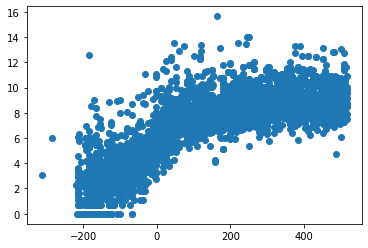

In [11]:
scatter = plt.figure()
ax = scatter.add_subplot(111)
ax.scatter(df['age'], np.log(df['num_ratings']))
#ax.set(yscale = "log")
#ax.set_ylim(0, 1000000)
plt.show()

## Scatter plot: num_reviews vs age of book

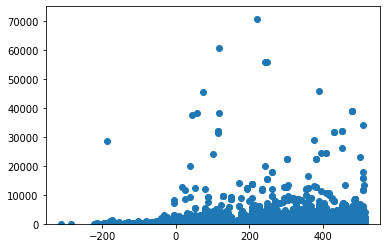

In [8]:
scatter = plt.figure()
ax = scatter.add_subplot(111)
ax.scatter(df['age'], df['num_reviews'])
ax.set_ylim(0, 75000)
plt.show()

There's one remarkable outlier which has > 6x as many ratings as the second highest rated book. This book is "The Hunger Games" by Suzanne Collins and is just a later edition of the 2008 best-seller. For full entry, see below.

Unfortunately, there doesn't appear to be an obvious correlation between the age of a book and its number of reviews or ratings.

In [9]:
print(df.loc[np.argmax(df['num_ratings'])][:])

url                      https://www.goodreads.com/book/show/49494289-t...
title                                                     The Hunger Games
author                                                     Suzanne Collins
num_ratings                                                        6154931
num_reviews                                                         168431
avg_rating                                                            4.33
num_pages                                                            387.0
language                                                           English
publish_date                                           2019-12-19 00:00:00
genres                   ['Teen', 'Young Adult', 'Fantasy', 'Dystopia',...
characters               ['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...
series                                                 The Hunger Games #1
asin                                                            B002MQYOFW
rating_histogram         